In [0]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
review_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python/Yelp Reviews - 10000(1).csv')
review_df.shape

(10000, 11)

In [8]:
review_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_count
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,8
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,6
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,12
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,8
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,7/28/2012,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,8
9996,EKzMHI1tip8rC1-ZAy64yg,1/18/2012,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,9
9997,53YGfwmbW73JhFiemNeyzQ,11/16/2010,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,22
9998,9SKdOoDHcFoxK5ZtsgHJoA,12/2/2012,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,3


In [9]:
review_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [12]:
x = bow_converter.fit_transform(review_df['text'])
x

<10000x29221 sparse matrix of type '<class 'numpy.int64'>'
	with 862350 stored elements in Compressed Sparse Row format>

In [13]:
words = bow_converter.get_feature_names()
len(words)

29221

In [14]:
words[:10]

['0', '00', '000', '007', '00a', '00am', '00pm', '01', '02', '03']

In [0]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])

In [16]:
bigrams = bigram_converter.get_feature_names()
len(bigrams)

368937

In [17]:
bigrams[-10:]

['zuzu was',
 'zuzus room',
 'zweigel wine',
 'zwiebel kräuter',
 'zy world',
 'zzed in',
 'éclairs napoleons',
 'école lenôtre',
 'ém all',
 'òc châm']

In [0]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])

In [19]:
trigrams = trigram_converter.get_feature_names()
len(trigrams)

881609

In [20]:
trigrams[:10]

['0 0 eye',
 '0 20 less',
 '0 39 oz',
 '0 39 pizza',
 '0 5 i',
 '0 50 to',
 '0 6 can',
 '0 75 oysters',
 '0 75 that',
 '0 75 to']

In [21]:
print (len(words), len(bigrams), len(trigrams))

29221 368937 881609


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

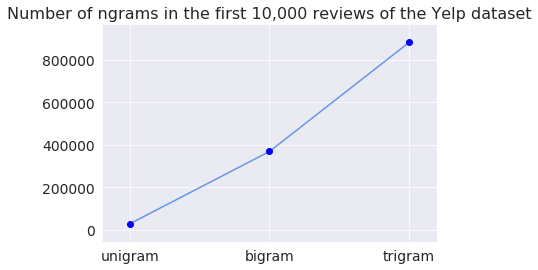

In [25]:
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()